In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import requests
import matplotlib.pyplot as plt
from scipy.stats import norm, t
import pywt
import os

from matplotlib.ticker import PercentFormatter, MultipleLocator
from scipy.stats import shapiro

import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
# These are the dates for the whole assignment
# Intentionally getting too much data

start_date = '21-05-2012'
end_date = '27-03-2024'

money_invested = 1000000
window = 700

# • Equity Portfolio

In [9]:

os.chdir(r"C:\Users\shara\OneDrive\Desktop\Machine learning")
import pywt
money_invested=1000000
daily_returns_equity=pd.read_csv(r"C:\Users\shara\OneDrive\Desktop\Machine learning\stOck.csv",index_col="Date")
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.linalg import eigvalsh

df_equity = daily_returns_equity

print(df_equity)

            XOM Returns  LIN Returns  META Returns  WMT Returns  \
Date                                                              
21/05/2012     0.006996     0.031111     -0.109861     0.009770   
22/05/2012    -0.001097    -0.006459     -0.089039     0.010946   
23/05/2012     0.001098     0.006222      0.032258     0.013337   
24/05/2012     0.006948     0.003969      0.032187     0.007588   
25/05/2012    -0.006416    -0.008366     -0.033909     0.003688   
...                 ...          ...           ...          ...   
21/03/2024     0.004425    -0.001050      0.004431     0.003265   
22/03/2024     0.000000     0.004160      0.003584    -0.009439   
25/03/2024     0.010221    -0.002862     -0.012873    -0.004929   
26/03/2024    -0.007501     0.001392     -0.014174    -0.000991   
27/03/2024     0.010370    -0.002823     -0.004094     0.003471   

            BRK-B Returns  LLY Returns  MSFT Returns  PLD Returns  \
Date                                                       

### Bond Data

In [10]:
daily_returns_bonds=pd.read_csv(r"C:\Users\shara\OneDrive\Desktop\Machine learning\BOnds.csv",index_col="Date")
df_bonds=daily_returns_bonds

print(df_bonds)

            AGG Returns  BND Returns  GOVT Returns  LQD Returns  SCHP Returns
Date                                                                         
21/05/2012    -0.000180     0.000119     -0.001982     0.001125      0.001911
22/05/2012    -0.002434    -0.001664     -0.002382    -0.002681     -0.001908
23/05/2012     0.001175     0.000714      0.001592     0.002429     -0.000348
24/05/2012    -0.000812    -0.001071      0.000397     0.000172     -0.001217
25/05/2012     0.001535     0.001191      0.000397     0.002509      0.000174
...                 ...          ...           ...          ...           ...
21/03/2024     0.000718     0.000830      0.000000     0.001480      0.001736
22/03/2024     0.003179     0.003319      0.003981     0.003416      0.003851
25/03/2024    -0.001840    -0.001930     -0.002203    -0.003405     -0.003453
26/03/2024     0.001024     0.000829      0.001325    -0.000277      0.000770
27/03/2024     0.003274     0.003450      0.002645     0.006927 

### Getting Risk Free Rate

In [11]:
df_rf = pd.read_csv("DFF.csv") 
df_rf['DATE'] = pd.to_datetime(df_rf['DATE'], format='%Y-%m-%d')

df_rf = df_rf.rename(columns={"DATE": "Date"})

df_rf = df_rf[(df_rf['Date'] >= start_date) & (df_rf['Date'] <= end_date)]
df_rf = df_rf.sort_values(by='Date')

df_rf = df_rf.reset_index(drop=True)

df_rf.iloc[:, 1:] = df_rf.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
numeric_columns = df_rf.columns[1:]
df_rf[numeric_columns] = df_rf[numeric_columns].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Divide all columns except 'Date' by 100 to convert from percent to decimal
df_rf.iloc[:, 1:] = df_rf.iloc[:, 1:] / 100

# converting from annual return (decimal) to daily return (decimal)
df_rf.iloc[:, 1:] = df_rf.iloc[:, 1:] / 360 # Conventionally uses 360, not business days

# Convert 'Date' column to datetime format
df_rf['Date'] = pd.to_datetime(df_rf['Date'])

# Set 'Date' column as the index
df_rf.set_index('Date', inplace=True)

# Filter df_rf to keep only the rows where the index matches the dates from daily_returns_equity
filtered_df_rf = df_rf[df_rf.index.isin(daily_returns_equity.index)]

df_rf = filtered_df_rf

df_rf



,DFF
Date,
2012-05-21,0.000004
2012-05-22,0.000004
2012-05-23,0.000004
2012-05-24,0.000004
2012-05-25,0.000004
...,...
2024-03-21,0.000148
2024-03-22,0.000148
2024-03-25,0.000148


In [12]:
mean_risk_free = df_rf.iloc[:, 0].mean()

formatted_value = '{:.4%}'.format(mean_risk_free)
#print("Formatted value:", formatted_value)

print(formatted_value)


0.0033%


### Combining debt data and bond data

In [13]:
df_all = df_bonds.join(df_equity)
df_all

,AGG Returns,BND Returns,GOVT Returns,LQD Returns,SCHP Returns,XOM Returns,LIN Returns,META Returns,WMT Returns,BRK-B Returns,LLY Returns,MSFT Returns,PLD Returns,NEE Returns,CL Returns,GE Returns
Date,,,,,,,,,,,,,,,,
21/05/2012,-0.000180,0.000119,-0.001982,0.001125,0.001911,0.006996,0.031111,-0.109861,0.009770,0.011279,0.004698,0.016399,0.041061,0.003077,0.001721,0.008971
22/05/2012,-0.002434,-0.001664,-0.002382,-0.002681,-0.001908,-0.001097,-0.006459,-0.089039,0.010946,-0.001880,0.009107,0.000336,-0.012422,0.006289,0.002324,0.003138
23/05/2012,0.001175,0.000714,0.001592,0.002429,-0.000348,0.001098,0.006222,0.032258,0.013337,0.001255,-0.008049,-0.021841,0.005031,-0.010212,-0.008065,0.000000
24/05/2012,-0.000812,-0.001071,0.000397,0.000172,-0.001217,0.006948,0.003969,0.032187,0.007588,0.000627,0.012048,-0.001375,-0.005632,0.001386,0.007521,0.003650
25/05/2012,0.001535,0.001191,0.000397,0.002509,0.000174,-0.006416,-0.008366,-0.033909,0.003688,-0.006892,-0.001215,-0.000344,-0.008811,0.004614,-0.003329,-0.002597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21/03/2024,0.000718,0.000830,0.000000,0.001480,0.001736,0.004425,-0.001050,0.004431,0.003265,-0.005599,-0.003364,0.009736,0.009246,-0.013505,0.004754,0.015581
22/03/2024,0.003179,0.003319,0.003981,0.003416,0.003851,0.000000,0.004160,0.003584,-0.009439,-0.005268,0.000454,-0.001467,-0.009778,0.006845,0.004844,-0.008435
25/03/2024,-0.001840,-0.001930,-0.002203,-0.003405,-0.003453,0.010221,-0.002862,-0.012873,-0.004929,-0.004082,0.003283,-0.013715,-0.011584,0.013435,-0.006278,-0.009478


In [14]:


# Make sure all indices are in the same date format and set as index
df_equity.index = pd.to_datetime(df_equity.index)
df_bonds.index = pd.to_datetime(df_bonds.index)

# Convert DFF to a daily percentage return for consistency with other returns
df_rf['DFF'] = df_rf['DFF'] / 100
df_equity_excess_returns = df_equity.sub(df_rf['DFF'], axis=0)
df_debt_excess_returns = df_bonds.sub(df_rf['DFF'], axis=0)
df_equity_and_debt_excess_returns = df_debt_excess_returns.join(df_equity_excess_returns)
df_equity_and_debt_excess_returns.dropna(inplace=True)  # Remove any rows with NaN values
print(df_equity_and_debt_excess_returns)


            AGG Returns  BND Returns  GOVT Returns  LQD Returns  SCHP Returns  \
Date                                                                            
2012-05-21    -0.000180     0.000119     -0.001982     0.001125      0.001911   
2012-05-22    -0.002434    -0.001664     -0.002382    -0.002681     -0.001908   
2012-05-23     0.001175     0.000714      0.001592     0.002429     -0.000348   
2012-05-24    -0.000812    -0.001071      0.000397     0.000172     -0.001217   
2012-05-25     0.001535     0.001191      0.000397     0.002509      0.000174   
...                 ...          ...           ...          ...           ...   
2024-03-21     0.000717     0.000829     -0.000001     0.001478      0.001735   
2024-03-22     0.003178     0.003318      0.003979     0.003415      0.003850   
2024-03-25    -0.001842    -0.001931     -0.002204    -0.003406     -0.003454   
2024-03-26     0.001023     0.000827      0.001323    -0.000279      0.000768   
2024-03-27     0.003273     

C:\Users\shara\AppData\Local\Temp\ipykernel_18080\3563832263.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_equity.index = pd.to_datetime(df_equity.index)
C:\Users\shara\AppData\Local\Temp\ipykernel_18080\3563832263.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_bonds.index = pd.to_datetime(df_bonds.index)


# All Functions

In [15]:

def Portfolios_1(mean_returns, cov_matrix, daily_returns=daily_returns_equity, Rf=0, graph=True, CML=True, portfolio=True, series_label=None, color_line=None, pos_plot=1.0, neg_plot=0.0):
    e = np.ones(len(cov_matrix))
    icov = np.linalg.inv(cov_matrix)
    h = np.matmul(e, icov)
    g = np.matmul(mean_returns, icov)
    a = np.sum(e * h)
    b = np.sum(mean_returns * h)
    c = np.sum(mean_returns * g)
    d = a * c - b ** 2

    MVP_weights = h / a
    MVP_return = b / a
    MVP_std = (1 / a) ** (1 / 2)

    Tan_return = (c - b * Rf) / (b - a * Rf)
    Tan_std = ((a * Tan_return ** 2 - 2 * b * Tan_return + c) / d) ** (1 / 2)
    CML_Slope = (Tan_return - Rf) / Tan_std

    Lambda = (c - b * Tan_return) / d
    mu = (a * Tan_return - b) / d

    Tan_weight = Lambda * h + mu * g

    # Calculate the mean return of individual assets
    mean_asset_returns = np.mean(daily_returns, axis=0)

    # Construct an equally weighted portfolio
    num_assets = len(mean_returns)
    equally_weighted_weights = np.ones(num_assets) / num_assets

    equally_weighted_return = np.dot(mean_returns, equally_weighted_weights)
    equally_weighted_std = np.sqrt(np.dot(equally_weighted_weights.T, np.dot(cov_matrix, equally_weighted_weights)))

    results = {}
    results['MVP'] = {}
    results['Optimal'] = {}
    results['Equally Weighted'] = {}

    results['MVP']['weights'] = MVP_weights
    results['MVP']['return'] = MVP_return
    results['MVP']['std'] = MVP_std
    results['MVP']['excess return'] = MVP_return - Rf
    results['MVP']['Sharpe Ratio'] = results['MVP']['excess return'] / MVP_std

    results['Optimal']['weights'] = Tan_weight
    results['Optimal']['return'] = Tan_return
    results['Optimal']['std'] = Tan_std
    results['Optimal']['excess return'] = Tan_return - Rf
    results['Optimal']['Sharpe Ratio'] = CML_Slope

    results['Equally Weighted']['weights'] = equally_weighted_weights
    results['Equally Weighted']['return'] = equally_weighted_return
    results['Equally Weighted']['std'] = equally_weighted_std
    results['Equally Weighted']['excess return'] = equally_weighted_return - Rf
    results['Equally Weighted']['Sharpe Ratio'] = (equally_weighted_return - Rf) / equally_weighted_std

    print('\nMVP_weights', MVP_weights)
    print('\nTan_weight', Tan_weight)
    print('\nEqual_weights', equally_weighted_weights)

    # Plot
    if graph:
        exp_returns_array = np.arange(-max(mean_returns) * (1.6) * neg_plot, max(mean_returns) * (1.6) * pos_plot, 0.0001)
        risk = ((a * exp_returns_array ** 2 - 2 * b * exp_returns_array + c) / d) ** (1 / 2)

        above_MVP_return = exp_returns_array > MVP_return
        plt.plot(risk[~above_MVP_return], exp_returns_array[~above_MVP_return], linestyle='--', color=color_line)
        if above_MVP_return.any():
            plt.plot(risk[above_MVP_return], exp_returns_array[above_MVP_return], label=series_label, linestyle='-',
                     color=color_line)

        if portfolio:
            plt.scatter(MVP_std, MVP_return, label='Min Var P')
            plt.scatter(Tan_std, Tan_return, label='Tang. P')
            plt.scatter(equally_weighted_std, equally_weighted_return, label='Equally Weighted P')

            if CML:
                risk_array = np.arange(0, 0.07, 0.001)
                plt.plot(risk_array, Rf + risk_array * CML_Slope, label='CAL')
        plt.legend()
    else:
        return results

    return results
def PORTFOLIOS(df, Rf=0, graph=True, CML=True, portfolio=True, series_label=None, color_line=None, pos_plot=1.0, neg_plot=0.0):
    mean_returns = df.mean()
    cov_matrix = df.cov()
    tickers = df.columns.tolist()
    
    e = np.ones(len(cov_matrix))
    icov = np.linalg.inv(cov_matrix)
    h = np.matmul(e, icov)
    g = np.matmul(mean_returns, icov)
    a = np.sum(e * h)
    b = np.sum(mean_returns * h)
    c = np.sum(mean_returns * g)
    d = a * c - b ** 2

    MVP_weights = h / a
    MVP_return = b / a
    MVP_std = (1 / a) ** (1 / 2)

    Tan_return = (c - b * Rf) / (b - a * Rf)
    Tan_std = ((a * Tan_return ** 2 - 2 * b * Tan_return + c) / d) ** (1 / 2)
    CML_Slope = (Tan_return - Rf) / Tan_std

    Lambda = (c - b * Tan_return) / d
    mu = (a * Tan_return - b) / d

    Tan_weight = Lambda * h + mu * g

    # Construct an equally weighted portfolio
    num_assets = len(mean_returns)
    equally_weighted_weights = np.ones(num_assets) / num_assets

    equally_weighted_return = np.dot(mean_returns, equally_weighted_weights)
    equally_weighted_std = np.sqrt(np.dot(equally_weighted_weights.T, np.dot(cov_matrix, equally_weighted_weights)))

    results = {}


    # Construct a dictionary to store weights associated with tickers
    weights_by_ticker = {}

    for i, ticker in enumerate(tickers):
        weights_by_ticker[ticker] = {
            'MVP': MVP_weights[i],
            'Optimal': Tan_weight[i],
            'Equally Weighted': equally_weighted_weights[i]
        }

    # Add the weights by ticker dictionary to the results dictionary
    results['weights_by_ticker'] = weights_by_ticker

    results['MVP'] = {
        'weights': MVP_weights,
        'return': MVP_return,
        'std': MVP_std,
        'excess return': MVP_return - Rf,
        'Sharpe Ratio': (MVP_return - Rf) / MVP_std
    }

    results['Optimal'] = {
        'weights': Tan_weight,
        'return': Tan_return,
        'std': Tan_std,
        'excess return': Tan_return - Rf,
        'Sharpe Ratio': CML_Slope
    }

    results['Equally Weighted'] = {
        'weights': equally_weighted_weights,
        'return': equally_weighted_return,
        'std': equally_weighted_std,
        'excess return': equally_weighted_return - Rf,
        'Sharpe Ratio': (equally_weighted_return - Rf) / equally_weighted_std
    }

    # Calculate Daily Returns for each Portfolio
    daily_returns = pd.DataFrame({
        'MVP': np.dot(df, MVP_weights),
        'Optimal': np.dot(df, Tan_weight),
        'Equally Weighted': np.dot(df, equally_weighted_weights)
    }, index=df.index)

    # Add Daily Returns DataFrame to Results Dictionary
    results['daily_returns'] = daily_returns
    return results

def portfolio_VaR_nonparametric(portfolio_returns, portfolio_value=money_invested, confidence_level=0.99):
    
    portfolio_returns = portfolio_returns.drop(portfolio_returns.index[0])
    
    # Calculate VaR using historical simulation
    var_percentage = np.percentile(portfolio_returns, 100 * (1 - confidence_level))
    
    if portfolio_value is None:
        return var_percentage
    else:
        # Calculate the VaR in terms of monetary value
        var = portfolio_value * var_percentage
        return var

def portfolio_VaR_parametric(portfolio_returns, portfolio_value=money_invested, confidence_level=0.99):
    
    portfolio_returns = portfolio_returns.drop(portfolio_returns.index[0])
    
    # Calculate the mean and standard deviation of portfolio returns
    mean_return = np.mean(portfolio_returns)
    std_return = np.std(portfolio_returns)
    
    # Calculate the z-score corresponding to the confidence level
    z_score = norm.ppf(1 - (1 - confidence_level))
    
    # Calculate the VaR as a percentage of the portfolio value
    var_percentage = z_score * std_return - mean_return
    
    if portfolio_value is None:
        return var_percentage
    else:
        # Calculate the VaR in terms of monetary value
        var = portfolio_value * var_percentage
        var = -var # Doing this so it appears as negative to consistent with nonparametric
        return var

def portfolio_ES(portfolio_returns, portfolio_value=money_invested, confidence_level=0.99):
    
    portfolio_returns = portfolio_returns.drop(portfolio_returns.index[0])
    
    # Calculate the VaR using historical simulation
    var_percentage = np.percentile(portfolio_returns, 100 * (1 - confidence_level))
    
    # Calculate the indices of returns below the VaR threshold
    below_var_indices = np.where(portfolio_returns <= var_percentage)[0]
    
    if len(below_var_indices) == 0:
        return 0.0  # If no returns are below the VaR threshold, ES is zero
    
    # Calculate the Expected Shortfall
    es = np.mean(portfolio_returns[below_var_indices])
    
    # Multiply Expected Shortfall by portfolio value to express it in monetary terms
    es_monetary = es * portfolio_value
    
    return es_monetary

def spectral_risk_measure(portfolio_returns, portfolio_value=money_invested, risk_measure='VaR', confidence_level=0.99, wavelet='db1'):
    
    portfolio_returns = portfolio_returns.drop(portfolio_returns.index[0])
    
    # Perform wavelet decomposition
    coeffs = pywt.wavedec(portfolio_returns, wavelet)
    
    # Initialize an array to store risk measures for each frequency component
    spectral_risk = np.zeros(len(coeffs))
    
    # Calculate risk measure for each detail coefficient (frequency component)
    for i, coeff in enumerate(coeffs):
        if risk_measure == 'VaR':
            spectral_risk[i] = np.percentile(coeff, 100 * (1 - confidence_level))
        elif risk_measure == 'ES':
            below_var_indices = np.where(coeff <= np.percentile(coeff, 100 * (1 - confidence_level)))[0]
            if len(below_var_indices) == 0:
                spectral_risk[i] = 0.0
            else:
                spectral_risk[i] = np.mean(coeff[below_var_indices])
        # Add support for other risk measures as needed
    
    # Multiply risk measures by portfolio value to express them in monetary terms
    spectral_risk_monetary = spectral_risk * portfolio_value
    
    # Aggregate risk measures from different frequency components
    aggregated_risk = np.mean(spectral_risk_monetary)
    
    return aggregated_risk

def apply_rolling_window(return_series, window, func, portfolio_value=money_invested, risk_measure=None):
    if risk_measure == None:
        rolled = return_series.rolling(window).apply(lambda x: func(x, portfolio_value), raw=False)
    else:
        rolled = return_series.rolling(window).apply(lambda x: func(x, portfolio_value, risk_measure), raw=False)
    
    return rolled


def BRW_VaR(returns, portfolio_value=money_invested, lamb=0.85, significants=0.01):
    '''
    lamb value between 0-1, indicates the bias for more recent observations. Lower lamb means more bias to recent observations
    '''
    returns = returns.drop(returns.index[0])
    #Check if input is a pd.Series and convert to dataframe
    if isinstance(returns, pd.Series):
        rets = returns.to_frame()
    
    #Rename column
    rets.rename(columns={rets.columns[0] : 'Close'}, inplace=True)
    
    #Sort and assign recency rank
    rets = rets.sort_values(by='Date', ascending=False)
    rets['Recency_rank'] = range(1, len(rets) + 1)
    
    #Add Weight vector
    rets.sort_values(by='Close', inplace=True)
    rets['W_Factor'] = rets['Recency_rank'].apply(lambda x: lamb**x)
    
    total = rets['W_Factor'].sum()
    
    #Adjust weight factor
    rets['Adjust'] = rets['W_Factor'].apply(lambda x: x/total)
    
    rets['Cumulative'] = rets['Adjust'].cumsum()
    
    
    rets['Diff'] = (rets['Cumulative'] - significants).abs()
    min_index = rets['Diff'].idxmin()
    closest_value = rets.loc[min_index, 'Close']
    
    return closest_value * portfolio_value

def Modified_VaR(returns, portfolio_value=money_invested, confidence=0.01):
    import scipy.stats as ss
    returns = returns.drop(returns.index[0])
    
    mean = returns.mean()
    std = np.std(returns, ddof=1)
    skew = ss.skew(returns)
    kurt = ss.kurtosis(returns)
    b = norm.ppf(confidence) + (1/6) * (norm.ppf(confidence)**2 - 1) * skew
    c = (1/24) * (norm.ppf(confidence)**3 - 3 * norm.ppf(confidence)) * kurt
    d = (1/36) * (2 * norm.ppf(confidence)**3 - 5 * norm.ppf(confidence)) * skew**2
    
    return (mean + std * (b + c + d)) * portfolio_value

def parametric_var_logistic(returns, alpha=0.01, portfolio_value=money_invested):
    mean = returns.mean()
    std = np.std(returns, ddof=1)
    scale = (std * np.sqrt(3)) / np.pi
    ans = mean + scale * (np.log(alpha / (1 - alpha)))
    
    return ans * portfolio_value

def parametric_var_T_dist(returns, alpha=0.01, portfolio_value=money_invested):
    import scipy.stats as ss
    
    returns = returns.drop(returns.index[0])
    mean = returns.mean()
    std = np.std(returns, ddof=1)
    kurt = ss.kurtosis(returns)
    df = np.absolute(np.floor((6/kurt) + 4))
    scale = std * ((df - 2) / df)**(1/2)
    t_inv = t.ppf(alpha, df)
    
    return (mean + scale * t_inv) * portfolio_value


#### Equity Results for entire time

Equity Portfolios Weights:
                     MVP   Optimal  Equally Weighted
XOM Returns    0.069875 -0.095562          0.090909
LIN Returns    0.095836  0.096233          0.090909
META Returns   0.024597  0.085624          0.090909
WMT Returns    0.247128  0.132062          0.090909
BRK-B Returns  0.180360  0.212423          0.090909
LLY Returns    0.084463  0.519444          0.090909
MSFT Returns  -0.026100  0.280918          0.090909
PLD Returns   -0.052925 -0.000627          0.090909
NEE Returns    0.121912  0.184237          0.090909
CL Returns     0.261787 -0.313156          0.090909
GE Returns    -0.006934 -0.101596          0.090909
                 MVP   Optimal  Equally Weighted
Date                                            
2012-05-21  0.003776  0.002743          0.002293
2012-05-22  0.002251 -0.002150         -0.007160
2012-05-23  0.001256 -0.004392          0.001003
2012-05-24  0.007110  0.007014          0.006265
2012-05-25 -0.002334 -0.002638         -0.005780
...  

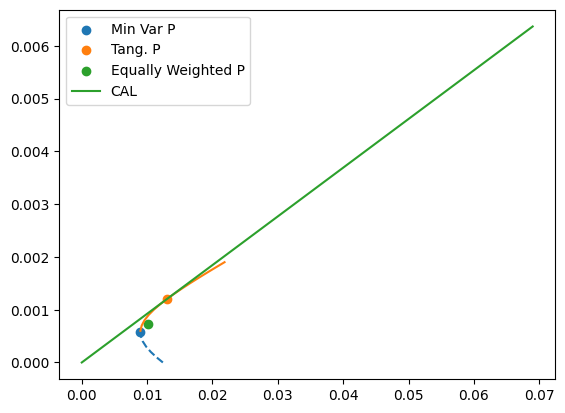

In [16]:

results_equity = PORTFOLIOS(df_equity, Rf=mean_risk_free)
equity_portfolios_weights = pd.DataFrame.from_dict(results_equity['weights_by_ticker'], orient='index')
print("Equity Portfolios Weights:\n", equity_portfolios_weights)
df_excess_equity_daily_returns = results_equity['daily_returns']
cov_matrix = daily_returns_equity.cov()
mean_returns = daily_returns_equity.mean()
print(df_excess_equity_daily_returns)
Portfolios_1(mean_returns, cov_matrix, daily_returns=daily_returns_equity)
df_excess_equity_daily_returns = results_equity['daily_returns']

In [17]:
# Metrics for the Equity Portfolios

keys_to_select = ['return', 'std', 'Sharpe Ratio']

# Create a new dictionary containing only the selected items
selected_items = {key: results_equity['Optimal'][key] for key in results_equity['Optimal'].keys() & keys_to_select}
df_optimal_results = pd.DataFrame.from_dict(selected_items, orient = 'index')
df_optimal_results.columns = ['Optimal']

# Create a new dictionary containing only the selected items
selected_items = {key: results_equity['MVP'][key] for key in results_equity['MVP'].keys() & keys_to_select}
df_MVP_results = pd.DataFrame.from_dict(selected_items, orient = 'index')
df_MVP_results.columns = ['MVP']

# Create a new dictionary containing only the selected items
selected_items = {key: results_equity['Equally Weighted'][key] for key in results_equity['Equally Weighted'].keys() & keys_to_select}
df_equal_results = pd.DataFrame.from_dict(selected_items, orient = 'index')
df_equal_results.columns = ['Equal Weights']

Equity_portfolios_metrics = pd.merge(df_optimal_results, df_MVP_results, left_index=True, right_index=True)
Equity_portfolios_metrics = pd.merge(Equity_portfolios_metrics, df_equal_results, left_index=True, right_index=True)
print('Equit_portfolios_metrics:\n', Equity_portfolios_metrics)

#Equity_portfolios_metrics.to_excel(os.path.join("Tables", 'Equity_Portfolios_Metrics.xlsx'), index=True)


Equit_portfolios_metrics:
                Optimal       MVP  Equal Weights
std           0.013388  0.008967       0.010108
return        0.001235  0.000572       0.000722
Sharpe Ratio  0.089771  0.060122       0.068168


In [18]:
MVP = df_excess_equity_daily_returns['MVP'] 

VaR_nonparametric = portfolio_VaR_nonparametric(MVP)
VaR_parametric = portfolio_VaR_parametric(MVP)
ES = portfolio_ES(MVP)
SRM = spectral_risk_measure(MVP)
BRW = BRW_VaR(MVP)
MVaR = Modified_VaR(MVP)
VaR_logistic = parametric_var_logistic(MVP)
VAR_T_dist = parametric_var_T_dist(MVP)

# Create a dictionary with the results
MVP_VaR_equity_results_dic = {
    "VaR nonparametric": VaR_nonparametric,
    "VaR parametric": VaR_parametric,
    "ES": ES,
    "Spectral Risk Measure": SRM,
    "Age Weighted": BRW,
    "Modified VaR": MVaR,
    "VaR Logistic distribution": VaR_logistic,
    "VaR T-distribution": VAR_T_dist
}

# Convert the dictionary into a DataFrame
MVP_VaR_equity_results = pd.DataFrame.from_dict(MVP_VaR_equity_results_dic, orient='index',columns=['MVP'])
#MVP_VaR_equity_results.to_excel(os.path.join("Tables", 'MVP_VaR_equity_results.xlsx'), index=True)
print(MVP_VaR_equity_results)

                                    MVP
VaR nonparametric         -24276.171714
VaR parametric            -20288.209384
ES                        -34135.123604
Spectral Risk Measure     -13835.779916
Age Weighted               -1617.798225
Modified VaR              -55377.215172
VaR Logistic distribution -22144.340502
VaR T-distribution        -23189.644115


In [19]:
Optimal = df_excess_equity_daily_returns['Optimal'] 

VaR_nonparametric = portfolio_VaR_nonparametric(Optimal)
VaR_parametric = portfolio_VaR_parametric(Optimal)
ES = portfolio_ES(Optimal)
SRM = spectral_risk_measure(Optimal)
BRW = BRW_VaR(Optimal)
MVaR = Modified_VaR(Optimal)
VaR_logistic = parametric_var_logistic(Optimal)
VAR_T_dist = parametric_var_T_dist(Optimal)

# Create a dictionary with the results
Optimal_VaR_equity_results_dic = {
    "VaR nonparametric": VaR_nonparametric,
    "VaR parametric": VaR_parametric,
    "ES": ES,
    "Spectral Risk Measure": SRM,
    "Age Weighted" : BRW,
    "Modified VaR": MVaR,
    "VaR Logistic distribution": VaR_logistic,
    "VaR T-distribution": VAR_T_dist
}

# Convert the dictionary into a DataFrame
Optimal_VaR_equity_results = pd.DataFrame.from_dict(Optimal_VaR_equity_results_dic, orient='index',columns=['Optimal'])
#Optimal_VaR_equity_results.to_excel(os.path.join("Tables", 'Optimal_VaR_equity_results.xlsx'), index=True)
print(Optimal_VaR_equity_results)


                                Optimal
VaR nonparametric         -33798.829484
VaR parametric            -29911.927894
ES                        -44604.926662
Spectral Risk Measure     -16889.688495
Age Weighted              -20534.424248
Modified VaR              -52083.294489
VaR Logistic distribution -32683.895116
VaR T-distribution        -34244.268477


In [20]:
Equal = df_excess_equity_daily_returns['Equally Weighted'] 

VaR_nonparametric = portfolio_VaR_nonparametric(Equal)
VaR_parametric = portfolio_VaR_parametric(Equal)
ES = portfolio_ES(Equal)
SRM = spectral_risk_measure(Equal)
BRW = BRW_VaR(Equal)
MVaR = Modified_VaR(Equal)
VaR_logistic = parametric_var_logistic(Equal)
VAR_T_dist = parametric_var_T_dist(Equal)

# Create a dictionary with the results
Equal_VaR_equity_results_dic = {
    "VaR nonparametric": VaR_nonparametric,
    "VaR parametric": VaR_parametric,
    "ES": ES,
    "Spectral Risk Measure": SRM,
    "Age Weighted" : BRW,
    "Modified VaR": MVaR,
    "VaR Logistic distribution": VaR_logistic,
    "VaR T-distribution": VAR_T_dist
}

# Convert the dictionary into a DataFrame
Equal_VaR_equity_results = pd.DataFrame.from_dict(Equal_VaR_equity_results_dic, orient='index', columns=['Equal'])
#Equal_VaR_equity_results.to_excel(os.path.join("Tables", 'Equal_weights_VaR_equity_results.xlsx'), index=True)
print(Equal_VaR_equity_results)

                                  Equal
VaR nonparametric         -26266.302218
VaR parametric            -22793.236401
ES                        -40904.160461
Spectral Risk Measure     -16068.644241
Age Weighted               -6010.790455
Modified VaR              -64425.477381
VaR Logistic distribution -24885.907705
VaR T-distribution        -26064.047033


In [21]:
# Merge results

VaRs_for_different_Portfolios = pd.merge(MVP_VaR_equity_results, Optimal_VaR_equity_results, left_index=True, right_index=True)
VaRs_for_different_Portfolios = pd.merge(VaRs_for_different_Portfolios, Equal_VaR_equity_results, left_index=True, right_index=True)
print(VaRs_for_different_Portfolios)



                                    MVP       Optimal         Equal
VaR nonparametric         -24276.171714 -33798.829484 -26266.302218
VaR parametric            -20288.209384 -29911.927894 -22793.236401
ES                        -34135.123604 -44604.926662 -40904.160461
Spectral Risk Measure     -13835.779916 -16889.688495 -16068.644241
Age Weighted               -1617.798225 -20534.424248  -6010.790455
Modified VaR              -55377.215172 -52083.294489 -64425.477381
VaR Logistic distribution -22144.340502 -32683.895116 -24885.907705
VaR T-distribution        -23189.644115 -34244.268477 -26064.047033


#### Bond Results 

Bond Portfolios Weights:


                    MVP   Optimal  Equally Weighted
AGG Returns   0.428715 -2.966550               0.2
BND Returns   0.564951  4.566387               0.2
GOVT Returns  0.340834  6.371598               0.2
LQD Returns  -0.435629 -5.439788               0.2
SCHP Returns  0.101129 -1.531647               0.2
                 MVP   Optimal  Equally Weighted
Date                                            
2012-05-21  0.003776  0.002743          0.002293
2012-05-22  0.002251 -0.002150         -0.007160
2012-05-23  0.001256 -0.004392          0.001003
2012-05-24  0.007110  0.007014          0.006265
2012-05-25 -0.002334 -0.002638         -0.005780
...              ...       ...               ...
2024-03-21 -0.001423 -0.005481          0.002538
2024-03-22 -0.000041 -0.001227         -0.001318
2024-03-25 -0.000522 -0.000608         -0.003533
2024-03-26 -0.000695 -0.003676         -0.004460
2024-03-27  0.009871  0.003178          0.012861

[2982 rows x 3 columns]

MVP_weights [ 0.42871518  0.56

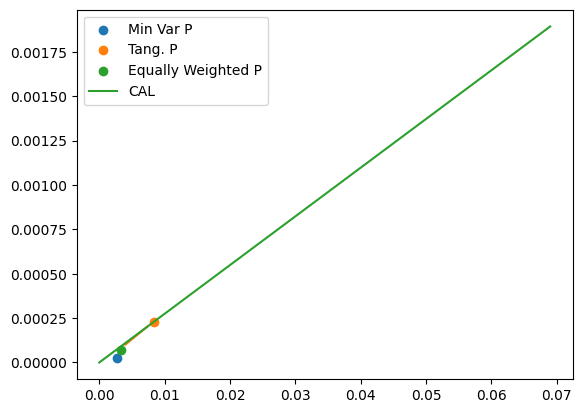

In [22]:


results_bonds = PORTFOLIOS(df_bonds, Rf=mean_risk_free)
bonds_portfolios_weights = pd.DataFrame.from_dict(results_bonds['weights_by_ticker'], orient='index')
print("Bond Portfolios Weights:\n", bonds_portfolios_weights)
df_excess_bonds_daily_returns = results_equity['daily_returns']
cov_matrix = daily_returns_bonds.cov()
mean_returns = daily_returns_bonds.mean()
print(df_excess_equity_daily_returns)
Portfolios_1(mean_returns, cov_matrix, daily_returns=daily_returns_bonds)
df_excess_daily_daily_returns = results_bonds['daily_returns']


In [23]:
df_bonds

,AGG Returns,BND Returns,GOVT Returns,LQD Returns,SCHP Returns
Date,,,,,
2012-05-21,-0.000180,0.000119,-0.001982,0.001125,0.001911
2012-05-22,-0.002434,-0.001664,-0.002382,-0.002681,-0.001908
2012-05-23,0.001175,0.000714,0.001592,0.002429,-0.000348
2012-05-24,-0.000812,-0.001071,0.000397,0.000172,-0.001217
2012-05-25,0.001535,0.001191,0.000397,0.002509,0.000174
...,...,...,...,...,...
2024-03-21,0.000718,0.000830,0.000000,0.001480,0.001736
2024-03-22,0.003179,0.003319,0.003981,0.003416,0.003851
2024-03-25,-0.001840,-0.001930,-0.002203,-0.003405,-0.003453


In [24]:
MVP = df_excess_bonds_daily_returns['MVP'] 


###
VaR_nonparametric = portfolio_VaR_nonparametric(MVP)
VaR_parametric = portfolio_VaR_parametric(MVP)
ES = portfolio_ES(MVP)
SRM = spectral_risk_measure(MVP)
BRW = BRW_VaR(MVP)
MVaR = Modified_VaR(MVP)
VaR_logistic = parametric_var_logistic(MVP)
VAR_T_dist = parametric_var_T_dist(MVP)

# Create a dictionary with the results
MVP_VaR_debt_results_dic = {
    "VaR nonparametric": VaR_nonparametric,
    "VaR parametric": VaR_parametric,
    "ES": ES,
    "Spectral Risk Measure": SRM,
    "Age Weighted" : BRW,
    "Modified VaR": MVaR,
    "VaR Logistic distribution": VaR_logistic,
    "VaR T-distribution": VAR_T_dist
}

# Convert the dictionary into a DataFrame
MVP_VaR_debt_results = pd.DataFrame.from_dict(MVP_VaR_debt_results_dic, orient='index', columns=['MVP'])
#MVP_VaR_debt_results.to_excel(os.path.join("Tables", 'MVP_VaR_debt_results.xlsx'), index=True)
print(MVP_VaR_debt_results)

                                    MVP
VaR nonparametric         -24276.171714
VaR parametric            -20288.209384
ES                        -34135.123604
Spectral Risk Measure     -13835.779916
Age Weighted               -1617.798225
Modified VaR              -55377.215172
VaR Logistic distribution -22144.340502
VaR T-distribution        -23189.644115


In [25]:
parametric_var_T_dist(MVP)

-23189.644114508585

In [26]:

Optimal = df_excess_bonds_daily_returns['Optimal'] 
###
VaR_nonparametric = portfolio_VaR_nonparametric(Optimal)
VaR_parametric = portfolio_VaR_parametric(Optimal)
ES = portfolio_ES(Optimal)
SRM = spectral_risk_measure(Optimal)
BRW = BRW_VaR(Optimal)
MVaR = Modified_VaR(Optimal)
VaR_logistic = parametric_var_logistic(Optimal)
VAR_T_dist = parametric_var_T_dist(Optimal)

# Create a dictionary with the results
Optimal_VaR_debt_results_dic = {
    "VaR nonparametric": VaR_nonparametric,
    "VaR parametric": VaR_parametric,
    "ES": ES,
    "Spectral Risk Measure": SRM,
    "Age Weighted" : BRW,
    "Modified VaR": MVaR,
    "VaR Logistic distribution": VaR_logistic,
    "VaR T-distribution": VAR_T_dist
}

# Convert the dictionary into a DataFrame
Optimal_VaR_debt_results = pd.DataFrame.from_dict(Optimal_VaR_debt_results_dic, orient='index',columns=['Optimal'])

print(Optimal_VaR_debt_results)

                                Optimal
VaR nonparametric         -33798.829484
VaR parametric            -29911.927894
ES                        -44604.926662
Spectral Risk Measure     -16889.688495
Age Weighted              -20534.424248
Modified VaR              -52083.294489
VaR Logistic distribution -32683.895116
VaR T-distribution        -34244.268477


In [27]:
Equal = df_excess_bonds_daily_returns['Equally Weighted'] 

VaR_nonparametric = portfolio_VaR_nonparametric(Equal)
VaR_parametric = portfolio_VaR_parametric(Equal)
ES = portfolio_ES(Equal)
SRM = spectral_risk_measure(Equal)
BRW = BRW_VaR(Equal)
MVaR = Modified_VaR(Equal)
VaR_logistic = parametric_var_logistic(Equal)
VAR_T_dist = parametric_var_T_dist(Equal)

# Create a dictionary with the results
Equal_VaR_debt_results_dic = {
    "VaR nonparametric": VaR_nonparametric,
    "VaR parametric": VaR_parametric,
    "ES": ES,
    "Spectral Risk Measure": SRM,
    "Age Weighted" : BRW,
    "Modified VaR": MVaR,
    "VaR Logistic distribution": VaR_logistic,
    "VaR T-distribution": VAR_T_dist
}

# Convert the dictionary into a DataFrame
Equal_VaR_debt_results = pd.DataFrame.from_dict(Equal_VaR_debt_results_dic, orient='index',columns=['Equal'])
#Equal_VaR_debt_results.to_excel(os.path.join("Tables", 'Equal_weights_VaR_debt_results.xlsx'), index=True)
print(Equal_VaR_debt_results)

                                  Equal
VaR nonparametric         -26266.302218
VaR parametric            -22793.236401
ES                        -40904.160461
Spectral Risk Measure     -16068.644241
Age Weighted               -6010.790455
Modified VaR              -64425.477381
VaR Logistic distribution -24885.907705
VaR T-distribution        -26064.047033


In [28]:
# Merge results

VaRs_for_different_Bond_Portfolios = pd.merge(MVP_VaR_debt_results, Optimal_VaR_debt_results, left_index=True, right_index=True)
VaRs_for_different_Bond_Portfolios = pd.merge(VaRs_for_different_Bond_Portfolios, Equal_VaR_debt_results, left_index=True, right_index=True)
print(VaRs_for_different_Bond_Portfolios)



                                    MVP       Optimal         Equal
VaR nonparametric         -24276.171714 -33798.829484 -26266.302218
VaR parametric            -20288.209384 -29911.927894 -22793.236401
ES                        -34135.123604 -44604.926662 -40904.160461
Spectral Risk Measure     -13835.779916 -16889.688495 -16068.644241
Age Weighted               -1617.798225 -20534.424248  -6010.790455
Modified VaR              -55377.215172 -52083.294489 -64425.477381
VaR Logistic distribution -22144.340502 -32683.895116 -24885.907705
VaR T-distribution        -23189.644115 -34244.268477 -26064.047033


Combined_Portfolios Weights:
                     MVP   Optimal  Equally Weighted
AGG Returns    0.182682  0.130230            0.0625
BND Returns    0.404102 -1.432321            0.0625
GOVT Returns   0.672767  1.123973            0.0625
LQD Returns   -0.421410  0.077359            0.0625
SCHP Returns   0.036581  0.285474            0.0625
XOM Returns    0.023042 -0.066817            0.0625
LIN Returns    0.023260  0.081720            0.0625
META Returns   0.003578  0.061345            0.0625
WMT Returns    0.015041  0.102467            0.0625
BRK-B Returns  0.055538  0.197971            0.0625
LLY Returns    0.005835  0.379012            0.0625
MSFT Returns   0.006672  0.215004            0.0625
PLD Returns   -0.006506 -0.003417            0.0625
NEE Returns   -0.025665  0.133198            0.0625
CL Returns     0.013692 -0.218788            0.0625
GE Returns     0.010792 -0.066411            0.0625
                 MVP   Optimal  Equally Weighted
Date                                 

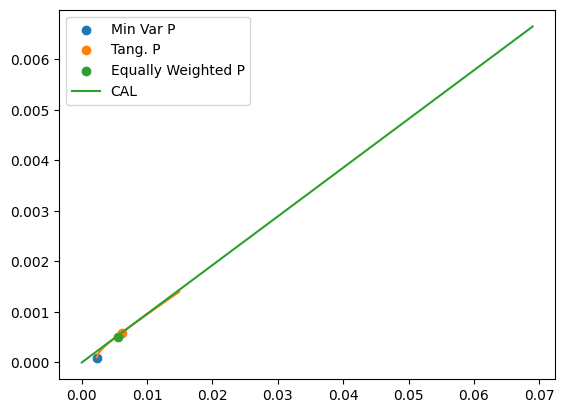

In [29]:

results_combined= PORTFOLIOS(df_all, Rf=mean_risk_free)
combined_portfolios_weights = pd.DataFrame.from_dict(results_combined['weights_by_ticker'], orient='index')
print("Combined_Portfolios Weights:\n", combined_portfolios_weights)
df_combined_returns= results_combined['daily_returns']
cov_matrix = df_combined_returns.cov()
mean_returns = df_combined_returns.mean()
print(df_excess_equity_daily_returns)
Portfolios_1(mean_returns, cov_matrix, daily_returns=daily_returns_bonds)
df_excess_daily_returns = results_combined['daily_returns']


In [30]:

MVP = df_combined_returns['MVP']

###
VaR_nonparametric = portfolio_VaR_nonparametric(MVP)
VaR_parametric = portfolio_VaR_parametric(MVP)
ES = portfolio_ES(MVP)
SRM = spectral_risk_measure(MVP)
BRW = BRW_VaR(MVP)
MVaR = Modified_VaR(MVP)
VaR_logistic = parametric_var_logistic(MVP)
VAR_T_dist = parametric_var_T_dist(MVP)

# Create a dictionary with the results
MVP_VaR_combined_results_dic = {
    "VaR nonparametric": VaR_nonparametric,
    "VaR parametric": VaR_parametric,
    "ES": ES,
    "Spectral Risk Measure": SRM,
    "Age Weighted" : BRW,
    "Modified VaR": MVaR,
    "VaR Logistic distribution": VaR_logistic,
    "VaR T-distribution": VAR_T_dist
}

# Convert the dictionary into a DataFrame
MVP_VaR_combined_results = pd.DataFrame.from_dict(MVP_VaR_combined_results_dic, orient='index', columns=['MVP'])
print(MVP_VaR_combined_results)


                                    MVP
VaR nonparametric          -6103.256623
VaR parametric             -5207.026193
ES                         -8664.646047
Spectral Risk Measure      -4024.237448
Age Weighted               -2669.349411
Modified VaR              -12179.146827
VaR Logistic distribution  -5678.040534
VaR T-distribution         -5942.621213


In [31]:


Optimal = df_combined_returns['Optimal'] 
###
VaR_nonparametric = portfolio_VaR_nonparametric(Optimal)
VaR_parametric = portfolio_VaR_parametric(Optimal)
ES = portfolio_ES(Optimal)
SRM = spectral_risk_measure(Optimal)
BRW = BRW_VaR(Optimal)
MVaR = Modified_VaR(Optimal)
VaR_logistic = parametric_var_logistic(Optimal)
VAR_T_dist = parametric_var_T_dist(Optimal)

# Create a dictionary with the results
Optimal_VaR_combined_results_dic = {
    "VaR nonparametric": VaR_nonparametric,
    "VaR parametric": VaR_parametric,
    "ES": ES,
    "Spectral Risk Measure": SRM,
    "Age Weighted" : BRW,
    "Modified VaR": MVaR,
    "VaR Logistic distribution": VaR_logistic,
    "VaR T-distribution": VAR_T_dist
}

# Convert the dictionary into a DataFrame
Optimal_VaR_combined_results = pd.DataFrame.from_dict(Optimal_VaR_combined_results_dic, orient='index',columns=['Optimal'])
print(Optimal_VaR_combined_results)

                                Optimal
VaR nonparametric         -25152.086736
VaR parametric            -21948.094739
ES                        -31543.924267
Spectral Risk Measure     -12743.064514
Age Weighted              -14235.098505
Modified VaR              -30728.145382
VaR Logistic distribution -23985.036734
VaR T-distribution        -24708.018935


In [32]:
Equal = df_combined_returns['Equally Weighted'] 

VaR_nonparametric = portfolio_VaR_nonparametric(Equal)
VaR_parametric = portfolio_VaR_parametric(Equal)
ES = portfolio_ES(Equal)
SRM = spectral_risk_measure(Equal)
BRW = BRW_VaR(Equal)
MVaR = Modified_VaR(Equal)
VaR_logistic = parametric_var_logistic(Equal)
VAR_T_dist = parametric_var_T_dist(Equal)

# Create a dictionary with the results
Equal_VaR_combined_results_dic = {
    "VaR nonparametric": VaR_nonparametric,
    "VaR parametric": VaR_parametric,
    "ES": ES,
    "Spectral Risk Measure": SRM,
    "Age Weighted" : BRW,
    "Modified VaR": MVaR,
    "VaR Logistic distribution": VaR_logistic,
    "VaR T-distribution": VAR_T_dist
}

# Convert the dictionary into a DataFrame
Equal_VaR_combined_results = pd.DataFrame.from_dict(Equal_VaR_combined_results_dic, orient='index',columns=['Equal'])
print(Equal_VaR_combined_results)

                                  Equal
VaR nonparametric         -18181.578037
VaR parametric            -16014.474505
ES                        -29216.460754
Spectral Risk Measure     -12172.449904
Age Weighted              -10942.316375
Modified VaR              -47732.680999
VaR Logistic distribution -17485.705000
VaR T-distribution        -18313.988611


In [33]:
# Merge results

VaRs_for_different_combined_Portfolios = pd.merge(MVP_VaR_combined_results, Optimal_VaR_combined_results, left_index=True, right_index=True)
VaRs_for_different_combined_Portfolios = pd.merge(VaRs_for_different_combined_Portfolios, Equal_VaR_combined_results, left_index=True, right_index=True)
print(VaRs_for_different_combined_Portfolios)



                                    MVP       Optimal         Equal
VaR nonparametric          -6103.256623 -25152.086736 -18181.578037
VaR parametric             -5207.026193 -21948.094739 -16014.474505
ES                         -8664.646047 -31543.924267 -29216.460754
Spectral Risk Measure      -4024.237448 -12743.064514 -12172.449904
Age Weighted               -2669.349411 -14235.098505 -10942.316375
Modified VaR              -12179.146827 -30728.145382 -47732.680999
VaR Logistic distribution  -5678.040534 -23985.036734 -17485.705000
VaR T-distribution         -5942.621213 -24708.018935 -18313.988611


# Rolling Period

In [34]:

window = window # Previously established as 700

In [35]:
def calculate_rolled_results(df, end_date, window=window, confidence_interval=.99, portfolio_VaR_nonparametric=portfolio_VaR_nonparametric, portfolio_VaR_parametric=portfolio_VaR_parametric, portfolio_ES=portfolio_ES, spectral_risk_measure=spectral_risk_measure, BRW_VaR=BRW_VaR, Modified_VaR=Modified_VaR, portfolio_value=money_invested):
    df['Date'] = pd.to_datetime(df.index, format='%d/%m/%Y')
    df.set_index('Date', inplace=True)
    def apply_rolling_window(series, window, func):
        return series.rolling(window=window).apply(func)
    end_date_str='27-03-2024'

    # Convert the end_date string to datetime using the correct format
    end_date = pd.to_datetime(end_date_str, format='%d-%m-%Y')
    def generate_equity_results(df, window, confidence_interval, portfolio_VaR_nonparametric, portfolio_VaR_parametric, portfolio_ES, spectral_risk_measure, BRW_VaR, Modified_VaR):
        var_portfolio_nonparametric_rolled_percentile = apply_rolling_window(df, window, lambda x: portfolio_VaR_nonparametric(x, confidence_interval))
        var_portfolio_nonparametric_rolled = var_portfolio_nonparametric_rolled_percentile * portfolio_value
        var_portfolio_parametric_rolled_percentile = apply_rolling_window(df, window, lambda x: portfolio_VaR_parametric(x, confidence_interval))
        var_portfolio_parametric_rolled = var_portfolio_parametric_rolled_percentile * portfolio_value
        var_portfolio_ES_rolled_percentile = apply_rolling_window(df, window, lambda x: portfolio_ES(x, confidence_interval))
        var_portfolio_ES_rolled = var_portfolio_ES_rolled_percentile * portfolio_value
        

        results_dic = {
            "VaR nonparametric rolled": var_portfolio_nonparametric_rolled.iloc[-1:],
            "VaR parametric rolled": var_portfolio_parametric_rolled.iloc[-1:],
            "ES rolled": var_portfolio_ES_rolled.iloc[-1:],
             
        }

        return pd.DataFrame.from_dict(results_dic, orient='index')

    equity_results = {}

    # Slice the dataframe up to the specified end date
    df_sliced = df.loc[:end_date]

    for column in df_sliced.columns:
        equity_results[column] = generate_equity_results(df_sliced[column], window, confidence_interval, portfolio_VaR_nonparametric, portfolio_VaR_parametric, portfolio_ES, spectral_risk_measure, BRW_VaR, Modified_VaR)
        equity_results[column].rename(columns={equity_results[column].columns[0]: column}, inplace=True)

    merged_results = pd.concat(equity_results.values(), axis=1)

    # Calculate start date from end date and window size
    start_index = df_sliced.index[-window]
    start_date = start_index.strftime('%d-%m-%Y')

    # Modify the DataFrame title to include the start and end dates, and confidence interval
    title = f"{start_date} to {end_date} Rolled Results at {confidence_interval} Confidence Interval"
    
    merged_results.columns = pd.MultiIndex.from_product([[title], merged_results.columns])

    return merged_results

## Equity results for rolling period

In [36]:
equity_results = calculate_rolled_results(df_excess_equity_daily_returns, end_date='27-03-2024', window=window, confidence_interval=.99)
print(equity_results)



                         16-06-2021 to 2024-03-27 00:00:00 Rolled Results at 0.99 Confidence Interval  \
                                                                                                  MVP   
ES rolled                                                     -26349.318887                             
VaR nonparametric rolled                                      -22785.832417                             
VaR parametric rolled                                         -19083.619219                             

                                                         
                               Optimal Equally Weighted  
ES rolled                -38807.314622    -34670.701569  
VaR nonparametric rolled -33844.574944    -28572.592630  
VaR parametric rolled    -32810.771861    -22729.976218  


## Debt for rolling period

In [37]:
debt_results = calculate_rolled_results(df_excess_bonds_daily_returns, end_date='27-03-2024', window=window, confidence_interval=.99)
print(debt_results)


                         16-06-2021 to 2024-03-27 00:00:00 Rolled Results at 0.99 Confidence Interval  \
                                                                                                  MVP   
ES rolled                                                     -26349.318887                             
VaR nonparametric rolled                                      -22785.832417                             
VaR parametric rolled                                         -19083.619219                             

                                                         
                               Optimal Equally Weighted  
ES rolled                -38807.314622    -34670.701569  
VaR nonparametric rolled -33844.574944    -28572.592630  
VaR parametric rolled    -32810.771861    -22729.976218  


## Combined for rolling period

In [38]:
combined_results = calculate_rolled_results(df_combined_returns, end_date='27-03-2024', window=window, confidence_interval=.99)
print(combined_results)


KeyboardInterrupt: 

# Sensitivity Testing

#### Combined

In [ ]:
combined_results = calculate_rolled_results(df_combined_returns, end_date='27-03-2024', window=window+252, confidence_interval=.99)
print(combined_results)


                         16-06-2020 to 2024-03-27 00:00:00 Rolled Results at 0.99 Confidence Interval  \
                                                                                                  MVP   
ES rolled                                                      -8814.703284                             
VaR nonparametric rolled                                       -7389.296097                             
VaR parametric rolled                                          -6642.194727                             

                                                         
                               Optimal Equally Weighted  
ES rolled                -30145.212283    -23677.522364  
VaR nonparametric rolled -25011.080375    -18845.852417  
VaR parametric rolled    -24745.175225    -16031.175380  


In [ ]:
combined_results = calculate_rolled_results(df_combined_returns, end_date='27-03-2024', window=window-252, confidence_interval=.99)
print(combined_results)


                         15-06-2022 to 2024-03-27 00:00:00 Rolled Results at 0.99 Confidence Interval  \
                                                                                                  MVP   
ES rolled                                                      -8138.954157                             
VaR nonparametric rolled                                       -7381.466324                             
VaR parametric rolled                                          -7688.924741                             

                                                         
                               Optimal Equally Weighted  
ES rolled                -26630.942666    -20323.804260  
VaR nonparametric rolled -24262.710401    -15095.812456  
VaR parametric rolled    -23630.765741    -16050.994449  


In [ ]:
combined_results = calculate_rolled_results(df_combined_returns, end_date='27-03-2024', window=window, confidence_interval=.99)
print(combined_results)


                         16-06-2021 to 2024-03-27 00:00:00 Rolled Results at 0.99 Confidence Interval  \
                                                                                                  MVP   
ES rolled                                                      -9236.650646                             
VaR nonparametric rolled                                       -7750.013455                             
VaR parametric rolled                                          -7424.342296                             

                                                         
                               Optimal Equally Weighted  
ES rolled                -30199.416678    -25258.646982  
VaR nonparametric rolled -25060.319606    -20330.772435  
VaR parametric rolled    -24757.402147    -16748.833300  


In [ ]:
combined_results = calculate_rolled_results(df_combined_returns, end_date='27-03-2024', window=window, confidence_interval=.99)
print(combined_results)


                         16-06-2021 to 2024-03-27 00:00:00 Rolled Results at 0.99 Confidence Interval  \
                                                                                                  MVP   
ES rolled                                                      -9236.650646                             
VaR nonparametric rolled                                       -7750.013455                             
VaR parametric rolled                                          -7424.342296                             

                                                         
                               Optimal Equally Weighted  
ES rolled                -30199.416678    -25258.646982  
VaR nonparametric rolled -25060.319606    -20330.772435  
VaR parametric rolled    -24757.402147    -16748.833300  


In [ ]:
combined_results = calculate_rolled_results(df_combined_returns, end_date='27-03-2024', window=window, confidence_interval=.99)
print(combined_results)


                         16-06-2021 to 2024-03-27 00:00:00 Rolled Results at 0.99 Confidence Interval  \
                                                                                                  MVP   
ES rolled                                                      -9236.650646                             
VaR nonparametric rolled                                       -7750.013455                             
VaR parametric rolled                                          -7424.342296                             

                                                         
                               Optimal Equally Weighted  
ES rolled                -30199.416678    -25258.646982  
VaR nonparametric rolled -25060.319606    -20330.772435  
VaR parametric rolled    -24757.402147    -16748.833300  


#### Equity

In [ ]:
equity_results = calculate_rolled_results(df_excess_equity_daily_returns, end_date='27-03-2024', window=window+252, confidence_interval=.99)
print(equity_results)



                         16-06-2020 to 2024-03-27 00:00:00 Rolled Results at 0.99 Confidence Interval  \
                                                                                                  MVP   
ES rolled                                                     -25821.302880                             
VaR nonparametric rolled                                      -22271.835619                             
VaR parametric rolled                                         -18793.491187                             

                                                         
                               Optimal Equally Weighted  
ES rolled                -39564.388045     -32391.80775  
VaR nonparametric rolled -33612.160344     -25766.77950  
VaR parametric rolled    -32923.892758     -21990.98583  


In [ ]:
equity_results = calculate_rolled_results(df_excess_equity_daily_returns, end_date='27-03-2024', window=window-252, confidence_interval=.99)
print(equity_results)


                         15-06-2022 to 2024-03-27 00:00:00 Rolled Results at 0.99 Confidence Interval  \
                                                                                                  MVP   
ES rolled                                                     -23011.030899                             
VaR nonparametric rolled                                      -18711.404980                             
VaR parametric rolled                                         -18309.686650                             

                                                         
                               Optimal Equally Weighted  
ES rolled                -34754.841910    -28833.459534  
VaR nonparametric rolled -31621.973327    -22856.933396  
VaR parametric rolled    -31275.616379    -21424.758085  


In [ ]:
equity_results = calculate_rolled_results(df_excess_equity_daily_returns, end_date='27-03-2024', window=window, confidence_interval=.99)
print(equity_results)



                         16-06-2021 to 2024-03-27 00:00:00 Rolled Results at 0.99 Confidence Interval  \
                                                                                                  MVP   
ES rolled                                                     -26349.318887                             
VaR nonparametric rolled                                      -22785.832417                             
VaR parametric rolled                                         -19083.619219                             

                                                         
                               Optimal Equally Weighted  
ES rolled                -38807.314622    -34670.701569  
VaR nonparametric rolled -33844.574944    -28572.592630  
VaR parametric rolled    -32810.771861    -22729.976218  


In [ ]:
equity_results = calculate_rolled_results(df_excess_equity_daily_returns, end_date='27-03-2024', window=window, confidence_interval=.99)
print(equity_results)



KeyboardInterrupt: 

In [ ]:
equity_results = calculate_rolled_results(df_excess_equity_daily_returns, end_date='27-03-2024', window=window, confidence_interval=.99)
print(equity_results)




                         16-06-2021 to 2024-03-27 00:00:00 Rolled Results at 0.99 Confidence Interval  \
                                                                                                  MVP   
ES rolled                                                     -26349.318887                             
VaR nonparametric rolled                                      -22785.832417                             
VaR parametric rolled                                         -19083.619219                             

                                                         
                               Optimal Equally Weighted  
ES rolled                -38807.314622    -34670.701569  
VaR nonparametric rolled -33844.574944    -28572.592630  
VaR parametric rolled    -32810.771861    -22729.976218  


#### Debt

In [ ]:
debt_results = calculate_rolled_results(df_excess_bonds_daily_returns, end_date='27-03-2024', window=window+252, confidence_interval=.99)
print(debt_results)


                         16-06-2020 to 2024-03-27 00:00:00 Rolled Results at 0.99 Confidence Interval  \
                                                                                                  MVP   
ES rolled                                                     -25821.302880                             
VaR nonparametric rolled                                      -22271.835619                             
VaR parametric rolled                                         -18793.491187                             

                                                         
                               Optimal Equally Weighted  
ES rolled                -39564.388045     -32391.80775  
VaR nonparametric rolled -33612.160344     -25766.77950  
VaR parametric rolled    -32923.892758     -21990.98583  


In [ ]:
debt_results = calculate_rolled_results(df_excess_bonds_daily_returns, end_date='27-03-2024', window=window-252, confidence_interval=.99)
print(debt_results)


                         15-06-2022 to 2024-03-27 00:00:00 Rolled Results at 0.99 Confidence Interval  \
                                                                                                  MVP   
ES rolled                                                     -23011.030899                             
VaR nonparametric rolled                                      -18711.404980                             
VaR parametric rolled                                         -18309.686650                             

                                                         
                               Optimal Equally Weighted  
ES rolled                -34754.841910    -28833.459534  
VaR nonparametric rolled -31621.973327    -22856.933396  
VaR parametric rolled    -31275.616379    -21424.758085  


In [ ]:
debt_results = calculate_rolled_results(df_excess_bonds_daily_returns, end_date='27-03-2024', window=window, confidence_interval=.99)
print(debt_results)


                         16-06-2021 to 2024-03-27 00:00:00 Rolled Results at 0.99 Confidence Interval  \
                                                                                                  MVP   
ES rolled                                                     -26349.318887                             
VaR nonparametric rolled                                      -22785.832417                             
VaR parametric rolled                                         -19083.619219                             

                                                         
                               Optimal Equally Weighted  
ES rolled                -38807.314622    -34670.701569  
VaR nonparametric rolled -33844.574944    -28572.592630  
VaR parametric rolled    -32810.771861    -22729.976218  


# Creating Graphs of Returns with Normality Test

In [ ]:
def plot_and_test_normality(df, col_names, window_size=window, end_date='2024-03-28', df_name='Name', save_folder="Graphs"):
    df = df.drop(df.index[0])
    
    # Create save folder if it doesn't exist
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    
    if end_date is not None:
        # Select data up to the end date
        df = df.loc[:end_date]
    
    if window_size is not None:
        # Select the most recent window of data
        df = df.tail(window_size)
    
    for col_name in col_names:
        data = df[col_name]
        # Plot histogram
        plt.hist(data, bins=40, color='skyblue', edgecolor='black')
        # Construct title with keywords
        title = 'Histogram of {} {} Portfolio'.format(col_name, df_name)
        plt.title(title)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.savefig("{}/{}_histogram.svg".format(save_folder, col_name), format='svg')
        plt.show()

        # Calculate and print standard deviation
        std_dev = data.std()
        print("Standard Deviation of", col_name, df_name,":", std_dev)

        # Perform Shapiro-Wilk test for normality
        stat, p = shapiro(data)
        print("Shapiro-Wilk Test for", col_name)
        print("Test Statistic:", stat)
        print("p-value:", p)
        if p > 0.05:
            print("The data in {} portfolio appears to be normally distributed (fail to reject H0)".format(col_name))
        else:
            print("The data in {} portfolio does not appear to be normally distributed (reject H0)".format(col_name))

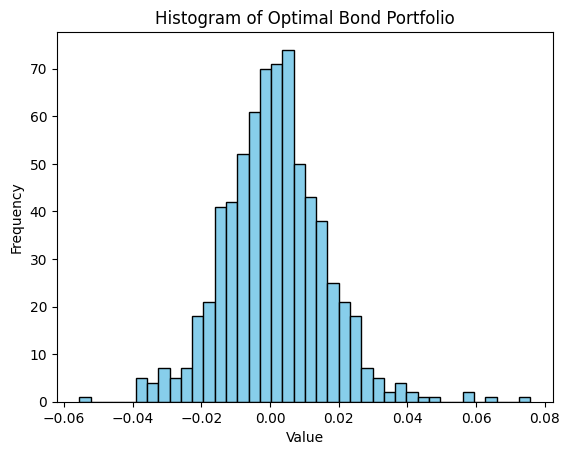

Standard Deviation of Optimal Bond : 0.014826962497794836
Shapiro-Wilk Test for Optimal
Test Statistic: 0.9820937514305115
p-value: 1.5024085087134154e-07
The data in Optimal portfolio does not appear to be normally distributed (reject H0)


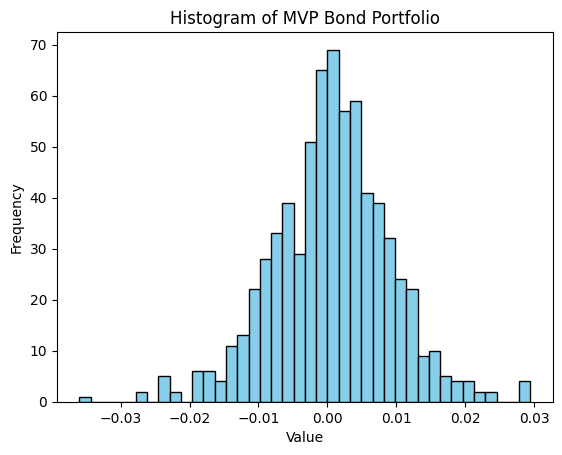

Standard Deviation of MVP Bond : 0.008570369079444902
Shapiro-Wilk Test for MVP
Test Statistic: 0.989858865737915
p-value: 9.346529259346426e-05
The data in MVP portfolio does not appear to be normally distributed (reject H0)


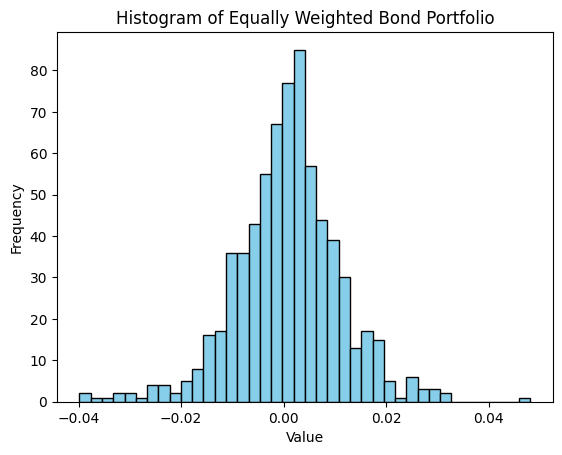

Standard Deviation of Equally Weighted Bond : 0.010231503885522563
Shapiro-Wilk Test for Equally Weighted
Test Statistic: 0.9775558710098267
p-value: 6.965921617307913e-09
The data in Equally Weighted portfolio does not appear to be normally distributed (reject H0)


In [ ]:
plot_and_test_normality(df_excess_bonds_daily_returns,['Optimal','MVP','Equally Weighted'],df_name='Bond',save_folder="bond Graphs")

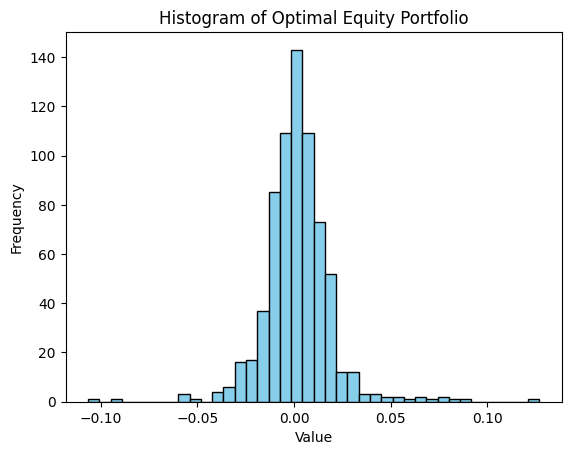

Standard Deviation of Optimal Equity : 0.017632079200025266
Shapiro-Wilk Test for Optimal
Test Statistic: 0.8894096612930298
p-value: 5.607407592218412e-22
The data in Optimal portfolio does not appear to be normally distributed (reject H0)


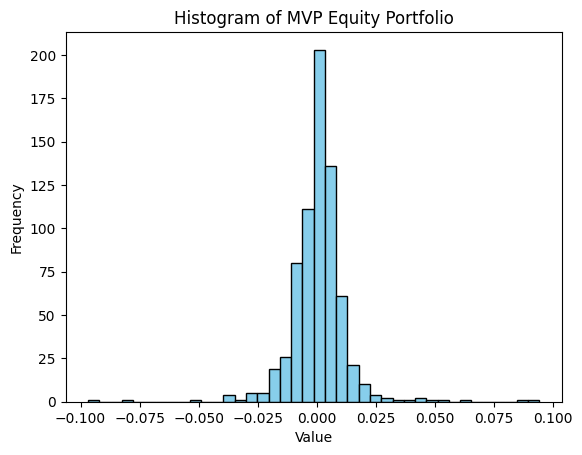

Standard Deviation of MVP Equity : 0.01227128882895284
Shapiro-Wilk Test for MVP
Test Statistic: 0.8035956621170044
p-value: 2.7758247732520944e-28
The data in MVP portfolio does not appear to be normally distributed (reject H0)


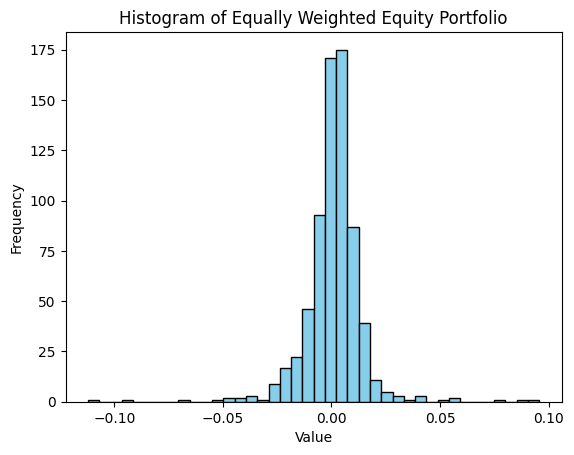

Standard Deviation of Equally Weighted Equity : 0.014095509866550627
Shapiro-Wilk Test for Equally Weighted
Test Statistic: 0.8076553344726562
p-value: 4.869725419962792e-28
The data in Equally Weighted portfolio does not appear to be normally distributed (reject H0)


In [ ]:
plot_and_test_normality(df_excess_equity_daily_returns,['Optimal','MVP','Equally Weighted'],df_name='Equity',save_folder="Equity Graphs 2022",end_date='2022-03-28')

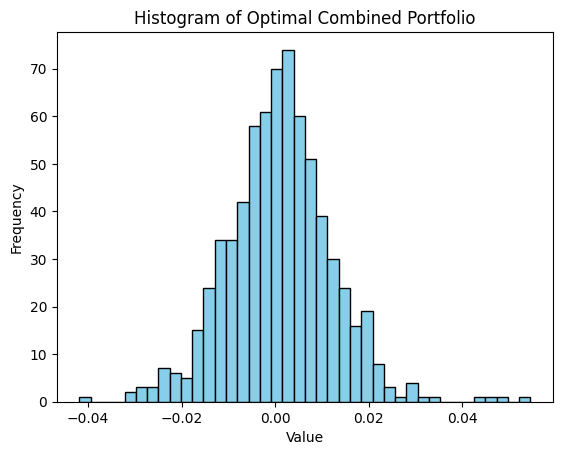

Standard Deviation of Optimal Combined : 0.011194293156231196
Shapiro-Wilk Test for Optimal
Test Statistic: 0.983628511428833
p-value: 4.682655116994283e-07
The data in Optimal portfolio does not appear to be normally distributed (reject H0)


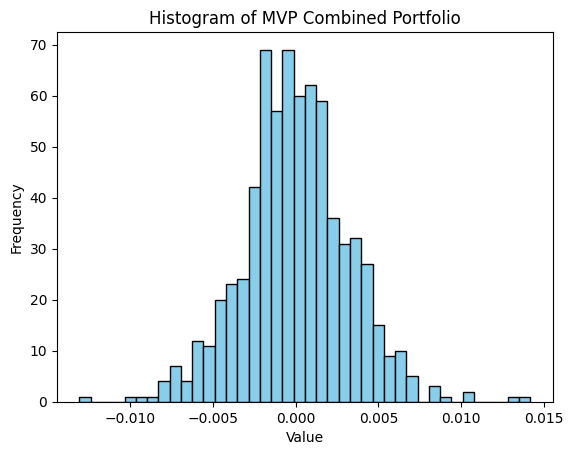

Standard Deviation of MVP Combined : 0.00323735767444967
Shapiro-Wilk Test for MVP
Test Statistic: 0.990304708480835
p-value: 0.0001437140890629962
The data in MVP portfolio does not appear to be normally distributed (reject H0)


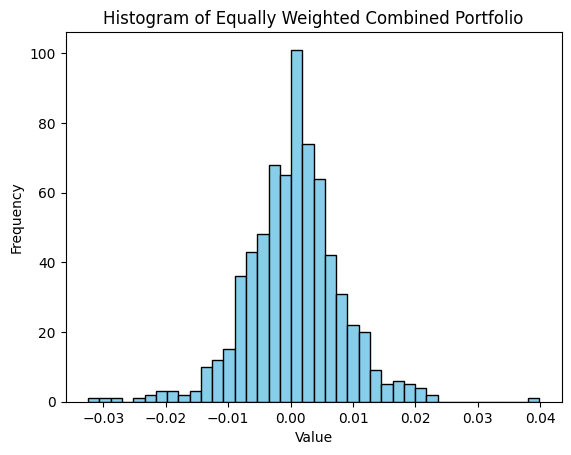

Standard Deviation of Equally Weighted Combined : 0.007508477988750555
Shapiro-Wilk Test for Equally Weighted
Test Statistic: 0.9762327671051025
p-value: 3.050555141825839e-09
The data in Equally Weighted portfolio does not appear to be normally distributed (reject H0)


In [ ]:
plot_and_test_normality(df_combined_returns,['Optimal','MVP','Equally Weighted'],df_name='Combined',save_folder="Combined Graphs")

## Alternate Risk measures


In [ ]:
import numpy as np
import pandas as pd
def downside_semi_deviation(returns, target_return=0):
    """
    Calculate the Downside Semi-Deviation of returns below a target threshold.
    
    Parameters:
    - returns (array-like): The list or array of returns.
    - target_return (float): The target or threshold return below which variability is measured.

    Returns:
    - float: The Downside Semi-Deviation.
    """
    returns = np.array(returns)
    negative_diffs = returns[returns < target_return]
    squared_deviations = (negative_diffs - target_return) ** 2
    mean_squared_deviations = np.mean(squared_deviations)
    return np.sqrt(mean_squared_deviations) if negative_diffs.size > 0 else 0
downside_semi_devs = df_excess_bonds_daily_returns.apply(lambda col: downside_semi_deviation(col, 0.01235))
print(downside_semi_devs)

MVP                 0.014946
Optimal             0.017779
Equally Weighted    0.015553
dtype: float64


In [ ]:
downside_semi_devs = df_excess_daily_daily_returns.apply(lambda col: downside_semi_deviation(col, 0.01235))
print(downside_semi_devs)

MVP                 0.012613
Optimal             0.022790
Equally Weighted    0.012719
dtype: float64


In [ ]:
downside_semi_devs = df_excess_daily_returns.apply(lambda col: downside_semi_deviation(col, 0.01235))
print(downside_semi_devs)

MVP                 0.012483
Optimal             0.015376
Equally Weighted    0.013852
dtype: float64


In [ ]:
import numpy as np

def exponential_srm(returns, threshold, theta):
    """
    Calculate the Exponential Shortfall Risk Measure for a series of returns.
    
    Parameters:
    - returns (array-like): The list or array of returns.
    - threshold (float): The target or threshold return.
    - theta (float): The risk aversion parameter.
    
    Returns:
    - float: The Exponential Shortfall Risk Measure.
    """
    returns = np.array(returns)
    exponential_terms = np.exp(-theta * (returns - threshold))
    average_exponential = np.mean(exponential_terms)
    return (1 / theta) * np.log(average_exponential)
# Parameters
threshold = 0.01235  # Example threshold
theta = 0.1        # Example theta value

# Applying the function to each column of the DataFrame
exponential_srm_values = df_excess_bonds_daily_returns.apply(lambda col: exponential_srm(col, threshold, theta))

print(exponential_srm_values)


MVP                 0.011782
Optimal             0.011124
Equally Weighted    0.011633
dtype: float64


In [ ]:
exponential_srm_values = df_excess_daily_daily_returns.apply(lambda col: exponential_srm(col, threshold, theta))
print(exponential_srm_values)

MVP                 0.012327
Optimal             0.012845
Equally Weighted    0.012282
dtype: float64


In [ ]:
exponential_srm_values = df_excess_daily_returns.apply(lambda col: exponential_srm(col, threshold, theta))
print(exponential_srm_values)

MVP                 0.012269
Optimal             0.011417
Equally Weighted    0.011835
dtype: float64


## Backtesting

In [44]:
from math import ceil
from scipy import stats
import pandas as pd

In [83]:

def backtesting(returns, WE, p, chart_name=None):
    returns = returns.drop(returns.index[0])
    T = len(returns)
    l1 = ceil(WE * p)
    value = 1
    VaR = np.full([T,1], np.nan)
    qps_scores = []
    
    c = WE * p

    for t in range(WE, T):
        t1 = t - WE
        t2 = t - 1       
        window = returns[t1:t2+1]

        # ys = np.sort(window)
        # VaR[t,0] = -ys[l1 - 1] * value             
        # VaR[t,0] = -parametric_var_T_dist(window, alpha=0.01, portfolio_value=1)
        VaR[t,0] = portfolio_VaR_nonparametric(window, portfolio_value=1, confidence_level=0.99)
        # VaR[t,0] = -portfolio_VaR_parametric(window, portfolio_value=1, confidence_level=0.99)
        # VaR[t,0] = -Modified_VaR(window, portfolio_value=1, confidence=0.01)
        # VaR[t,0] = -parametric_var_logistic(window, alpha=0.01, portfolio_value=1)
        
    VaR = VaR.flatten()
    
        
    W1 = WE

    VR = sum(returns[W1:T] < -VaR[W1:T])/(p*(T-WE))
    s = np.std(VaR[W1:T], ddof=1)
    print (f"{chart_name} \n", "Violation ratio:", round(VR, 3), "\n", "Volatility:", round(s,3), "\n")
    
    VaR =pd.Series(VaR)
    
    returns = returns.to_frame()
    name = returns.columns[0]
    returns.reset_index(inplace=True)
    
    plt.plot(returns[name][W1:T])
    plt.plot(VaR[W1:T])
    #plt.plot(qps_scores)
    plt.title(f"{chart_name} Backtesting")
    plt.show()
    plt.close()
    
    W1 = WE
    ya = returns[name][W1:T]
    VaRa = VaR[W1:T]

    
    q = returns[name][W1:T] < -VaR[W1:T]
    v = VaRa*0
    v[q] = 1
    ber = bern_test(p, v[:])
    ind = ind_test(v[:],T)
    
    print (f"{chart_name} \n",
           "Bernoulli:", "Test statistic =", round(ber,3), "p-value =", round(1 - stats.chi2.cdf(ber, 1),3), "\n",
           "Independence:", "Test statistic =", round(ind,3), "p-value =", round(1 - stats.chi2.cdf(ind, 1),3), "\n")
        
    return ya




def bern_test(p,v):
    lv = len(v)
    sv = sum(v)
    
    al = np.log(p)*sv + np.log(1-p)*(lv-sv)
    bl = np.log(sv/lv)*sv + np.log(1-sv/lv)*(lv-sv)
    
    return (-2*(al-bl))

W1=700
def ind_test(V,T):
    
    J = np.full([T,4], 0)
    for i in range(W1+1, W1+len(V)-1):
        J[i,0] = (V[i-1] == 0) & (V[i] == 0)
        J[i,1] = (V[i-1] == 0) & (V[i] == 1)
        J[i,2] = (V[i-1] == 1) & (V[i] == 0)
        J[i,3] = (V[i-1] == 1) & (V[i] == 1)

    V_00 = sum(J[:,0])
    V_01 = sum(J[:,1])
    V_10 = sum(J[:,2])
    V_11 = sum(J[:,3])
    
    p_00=V_00/(V_00+V_01)
    p_01=V_01/(V_00+V_01)
    p_10=V_10/(V_10+V_11)
    p_11=V_11/(V_10+V_11)
    
    hat_p = (V_01+V_11)/(V_00+V_01+V_10+V_11)
    al = np.log(1-hat_p)*(V_00+V_10) + np.log(hat_p)*(V_01+V_11)
    bl = np.log(p_00)*V_00 + np.log(p_01)*V_01 + np.log(p_10)*V_10 + np.log(p_11)*V_11
    
    return (-2*(al-bl))

In [84]:
data1 = df_excess_equity_daily_returns['Optimal'].dropna(axis=0)

Historic Simulation 
 Violation ratio: 97.896 
 Volatility: 0.005 



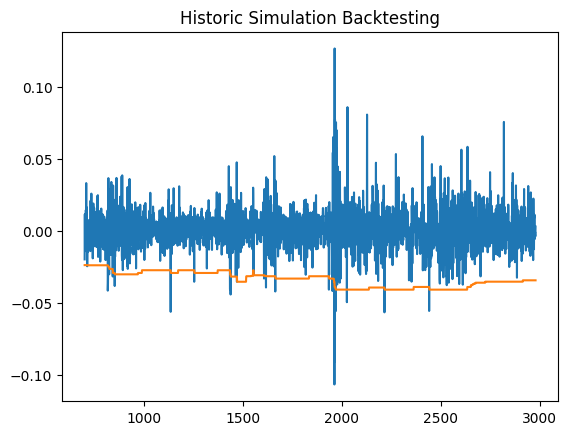

Historic Simulation 
 Bernoulli: Test statistic = 20102.0 p-value = 0.0 
 Independence: Test statistic = 0.0 p-value = 0.991 



700    -0.019657
701     0.011736
702    -0.013909
703    -0.001408
704     0.010536
          ...   
2976   -0.005481
2977   -0.001227
2978   -0.000608
2979   -0.003676
2980    0.003178
Name: Optimal, Length: 2281, dtype: float64

In [85]:
backtesting(data1, 700, 0.01, 'Historic Simulation')

Historic Simulation 
 Violation ratio: 98.729 
 Volatility: 0.025 



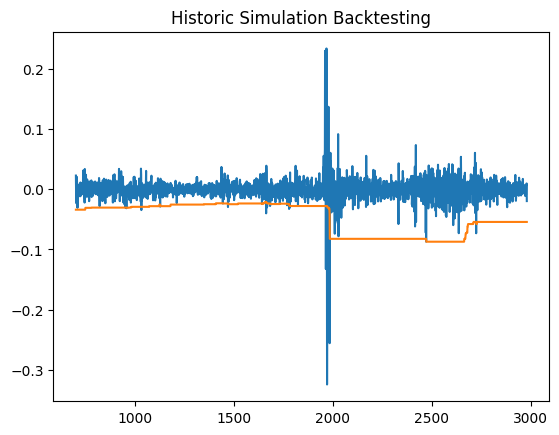

Historic Simulation 
 Bernoulli: Test statistic = 20431.465 p-value = 0.0 
 Independence: Test statistic = 38.472 p-value = 0.0 



700     0.022591
701    -0.005873
702     0.020964
703    -0.023602
704     0.013635
          ...   
2976   -0.009047
2977    0.006605
2978    0.006422
2979    0.009513
2980   -0.019795
Name: Optimal, Length: 2281, dtype: float64

In [78]:
data2=df_excess_daily_daily_returns['Optimal'].dropna(axis=0)
backtesting(data2, 700, 0.01, 'Historic Simulation')

Historic Simulation 
 Violation ratio: 98.115 
 Volatility: 0.003 



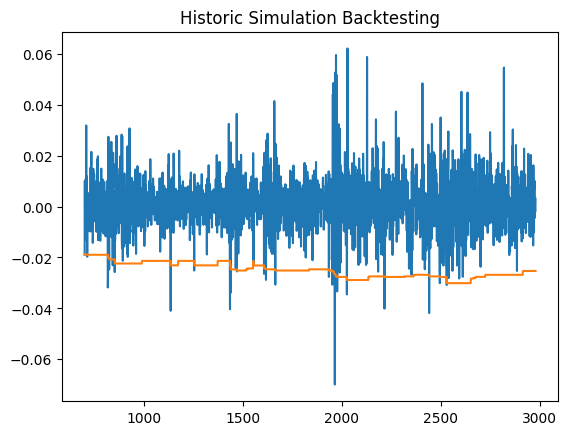

Historic Simulation 
 Bernoulli: Test statistic = 20186.901 p-value = 0.0 
 Independence: Test statistic = 0.043 p-value = 0.837 



700    -0.018935
701     0.010108
702    -0.013021
703    -0.000257
704     0.006939
          ...   
2976   -0.004456
2977    0.000350
2978   -0.002092
2979   -0.001800
2980    0.003097
Name: Optimal, Length: 2281, dtype: float64

In [79]:
data3=df_excess_daily_returns['Optimal'].dropna(axis=0)
backtesting(data3, 700, 0.01, 'Historic Simulation')

## Monte Carlo and HUll

In [ ]:
def monte_carlo_var_all_columns(returns_df, confidence_level=0.95, iterations=10000):
    """
    Calculate the Value at Risk (VaR) using the Monte Carlo simulation method for all columns in a DataFrame.

    Parameters:
    - returns_df (pandas.DataFrame): DataFrame containing historical return data.
    - confidence_level (float): Confidence level for VaR calculation (default is 95%).
    - iterations (int): Number of simulations to run.

    Returns:
    - dict: A dictionary with column names as keys and the calculated VaR as values.
    """
    if not 0 < confidence_level < 1:
        raise ValueError("Confidence level must be between 0 and 1.")
    if not isinstance(iterations, int) or iterations < 1:
        raise ValueError("Iterations must be a positive integer.")

    var_values = {}
    for column in returns_df.columns:
        # Extract the specified column and calculate mean and standard deviation
        returns = returns_df[column].values
        mean = np.mean(returns)
        std_dev = np.std(returns)

        # Simulate future returns using the normal distribution assumption
        simulated_returns = np.random.normal(mean, std_dev, size=iterations)

        # Calculate the VaR as the negative of the percentile of simulated returns
        VaR = -np.percentile(simulated_returns, (1 - confidence_level) * 100)
        var_values[column] = VaR

    return var_values

# Example usage:
# Assuming your DataFrame 'returns' is already defined and loaded with data
confidence_level = 0.99  # 99% confidence level
iterations = 1000  # Number of iterations for the simulation
var_results = monte_carlo_var_all_columns(df_excess_equity_daily_returns, confidence_level, iterations)

# Printing out the Value at Risk for each column
for portfolio, var_value in var_results.items():
    print(f"The Monte Carlo VaR for {portfolio} at {confidence_level*100}% confidence level is {var_value:.4f}")

The Monte Carlo VaR for MVP at 99.0% confidence level is 0.0206
The Monte Carlo VaR for Optimal at 99.0% confidence level is 0.0304
The Monte Carlo VaR for Equally Weighted at 99.0% confidence level is 0.0218


In [ ]:
from scipy.stats import norm

def hull_var_all_columns(returns_df, confidence_level=0.95):
    """
    Calculate the Value at Risk (VaR) using the Hull method (delta-normal approach) for all columns in a DataFrame.

    Parameters:
    - returns_df (pandas.DataFrame): DataFrame containing historical return data.
    - confidence_level (float): Confidence level for VaR calculation (default is 95%).

    Returns:
    - dict: A dictionary with column names as keys and the calculated VaR as values.
    """
    if not 0 < confidence_level < 1:
        raise ValueError("Confidence level must be between 0 and 1.")

    var_values = {}
    for column in returns_df.columns:
        # Calculate mean and standard deviation of the returns
        mean_return = returns_df[column].mean()
        std_dev = returns_df[column].std()

        # Calculate the z-score corresponding to the confidence level
        z_score = norm.ppf(confidence_level)

        # Calculate VaR using the Hull method
        VaR = -(mean_return - z_score * std_dev)
        var_values[column] = VaR

    return var_values

# Example usage:
# Assuming your DataFrame 'returns' is already defined and loaded with data
confidence_level = 0.95  # 99% confidence level
var_results = hull_var_all_columns(df_excess_equity_daily_returns, confidence_level)

# Printing out the Value at Risk for each column
for portfolio, var_value in var_results.items():
    print(f"The Hull VaR for {portfolio} at {confidence_level*100}% confidence level is {var_value:.4f}")

The Hull VaR for MVP at 95.0% confidence level is 0.0142
The Hull VaR for Optimal at 95.0% confidence level is 0.0208
The Hull VaR for Equally Weighted at 95.0% confidence level is 0.0159


## Expected spectral Hull MonteCarlo

In [ ]:
def monte_carlo_es_all_columns(returns_df, confidence_level=0.95, iterations=10000):
    """
    Calculate the Expected Shortfall (ES) using Monte Carlo simulation for all columns in a DataFrame.

    Parameters:
    - returns_df (pandas.DataFrame): DataFrame containing historical return data.
    - confidence_level (float): Confidence level for VaR and ES calculation (default is 95%).
    - iterations (int): Number of simulations to run.

    Returns:
    - dict: A dictionary with column names as keys and the calculated Expected Shortfall as values.
    """
    if not 0 < confidence_level < 1:
        raise ValueError("Confidence level must be between 0 and 1.")
    if not isinstance(iterations, int) or iterations < 1:
        raise ValueError("Iterations must be a positive integer.")

    es_values = {}
    for column in returns_df.columns:
        # Calculate mean and standard deviation of the returns
        mean_return = returns_df[column].mean()
        std_dev = returns_df[column].std()

        # Simulate future returns using the normal distribution assumption
        simulated_returns = np.random.normal(mean_return, std_dev, iterations)

        # Calculate VaR
        VaR = np.percentile(simulated_returns, (1 - confidence_level) * 100)

        # Calculate ES as the average of returns worse than VaR
        ES = np.mean(simulated_returns[simulated_returns <= VaR])
        es_values[column] = -ES  # Store positive value for ES

    return es_values

# Example usage:
# Assuming your DataFrame 'returns' is already defined and loaded with data
confidence_level = 0.99  # 99% confidence level
es_results = monte_carlo_es_all_columns(df_excess_bonds_daily_returns, confidence_level, iterations=1000)

# Printing out the Expected Shortfall for each column
for portfolio, es_value in es_results.items():
    print(f"The Monte Carlo ES for {portfolio} at {confidence_level*100}% confidence level is {es_value:.4f}")



The Monte Carlo ES for MVP at 99.0% confidence level is 0.0238
The Monte Carlo ES for Optimal at 99.0% confidence level is 0.0358
The Monte Carlo ES for Equally Weighted at 99.0% confidence level is 0.0256


In [ ]:
def hull_es_all_columns(returns_df, confidence_level=0.95):
    """
    Calculate the Expected Shortfall (ES) using the Hull method (delta-normal approach) for all columns in a DataFrame.

    Parameters:
    - returns_df (pandas.DataFrame): DataFrame named 'returns' containing historical return data.
    - confidence_level (float): Confidence level for VaR and ES calculation.

    Returns:
    - dict: A dictionary with column names as keys and the calculated Expected Shortfall as values.
    """
    if not 0 < confidence_level < 1:
        raise ValueError("Confidence level must be between 0 and 1.")

    es_values = {}
    for column in returns_df.columns:
        # Calculate mean and standard deviation of the returns
        mean_return = returns_df[column].mean()
        std_dev = returns_df[column].std()

        # Calculate VaR using the normal distribution
        z_score = norm.ppf(confidence_level)
        VaR = -(mean_return + z_score * std_dev)

        # Filter returns that are worse than VaR and calculate ES
        losses = returns_df[column][returns_df[column] <= VaR]
        ES = -losses.mean() if len(losses) > 0 else 0
        es_values[column] = ES

    return es_values

# Assume your DataFrame 'returns' is already defined and loaded with data
confidence_level = 0.99  # 99% confidence level
es_results = hull_es_all_columns(df_excess_bonds_daily_returns, confidence_level)

# Printing out the Expected Shortfall for each column
for portfolio, es_value in es_results.items():
    print(f"The Expected Shortfall (ES) for {portfolio} at {confidence_level*100}% confidence level is {es_value:.4f}")

The Expected Shortfall (ES) for MVP at 99.0% confidence level is 0.0312
The Expected Shortfall (ES) for Optimal at 99.0% confidence level is 0.0427
The Expected Shortfall (ES) for Equally Weighted at 99.0% confidence level is 0.0360
